In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from tslearn.barycenters import dtw_barycenter_averaging, softdtw_barycenter

In [2]:
trace_dist_matrix = np.genfromtxt('dist_matrix_trace.csv', delimiter=',')

In [3]:
trace_dist_matrix

array([[ 0.        ,  5.99520294,  0.81982696, ...,  0.73192837,
         0.68811671, 22.3260121 ],
       [ 5.99520294,  0.        ,  5.95935114, ...,  5.92258256,
         5.89534412, 17.56097866],
       [ 0.81982696,  5.95935114,  0.        , ...,  0.56259829,
         0.52000055, 17.4777197 ],
       ...,
       [ 0.73192837,  5.92258256,  0.56259829, ...,  0.        ,
         0.44708227, 20.56294225],
       [ 0.68811671,  5.89534412,  0.52000055, ...,  0.44708227,
         0.        , 22.09551316],
       [22.3260121 , 17.56097866, 17.4777197 , ..., 20.56294225,
        22.09551316,  0.        ]])

In [4]:
trace_series = np.genfromtxt('series_trace.csv', delimiter=',')

In [5]:
trace_series

array([[ 0.67487,  0.63045,  0.65475, ...,  0.57966,  0.63613,  0.65745],
       [ 0.70279,  0.71425,  0.66455, ...,  0.68652,  0.66786,  0.67568],
       [ 0.64599,  0.58009,  0.61606, ...,  0.58414,  0.64785,  0.59292],
       ...,
       [ 0.63762,  0.58508,  0.62313, ...,  0.63526,  0.62114,  0.64895],
       [ 0.61148,  0.59342,  0.58361, ...,  0.61426,  0.59227,  0.59775],
       [-1.3775 , -1.321  , -1.3544 , ...,  0.75743,  0.76473,  0.78055]])

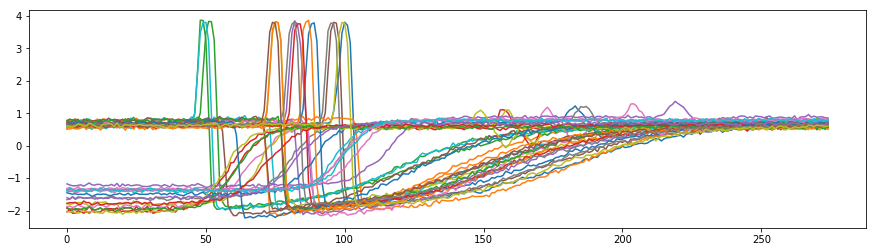

In [6]:
plt.figure(figsize=(15,4))
for s in trace_series:
    plt.plot(s)
plt.draw()

C:\Users\Toni\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


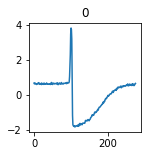

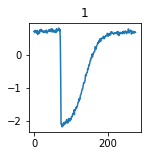

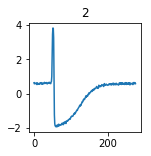

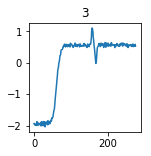

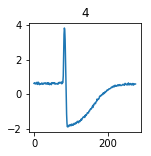

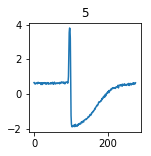

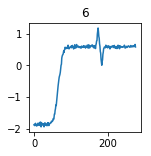

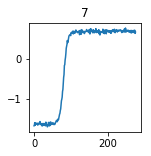

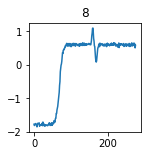

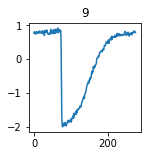

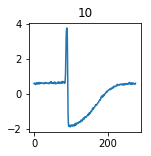

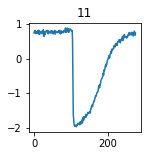

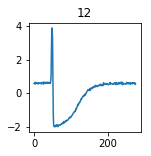

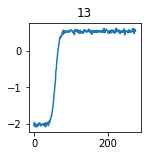

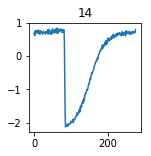

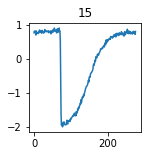

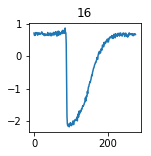

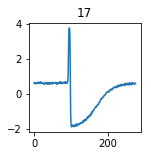

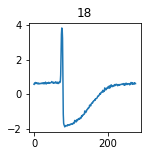

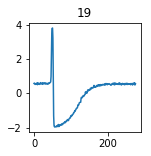

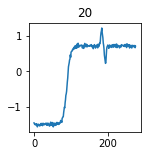

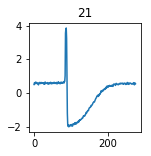

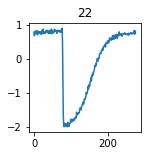

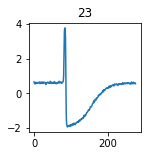

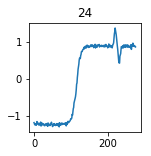

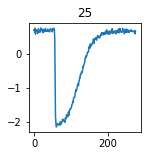

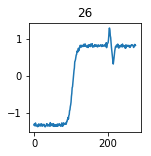

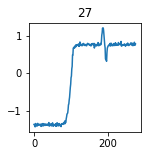

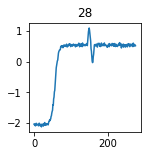

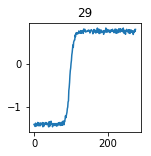

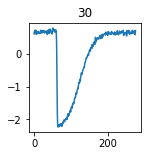

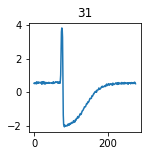

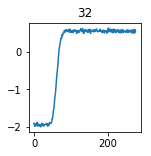

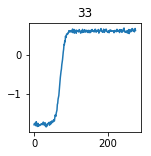

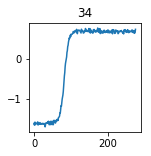

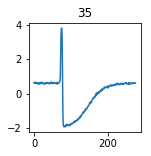

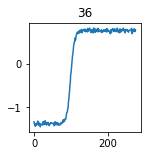

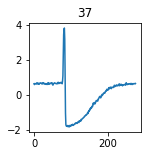

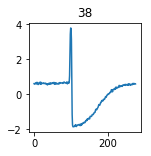

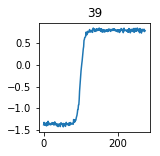

In [7]:
count = 0
for s in trace_series:
    plt.figure(figsize=(2,2))
    plt.plot(s)
    plt.title(count)
    count += 1
plt.show()

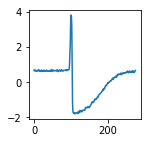

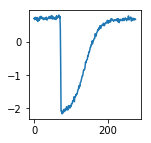

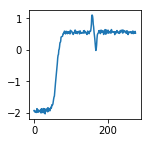

In [8]:
# Real clusters

# series:  00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19
# cluster:  0  1  0  2  0  0  2  2  2  1  0  1  0  2  1  1  1  0  0  0

# series:  20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
# cluster:  2  0  1  0  2  1  2  2  2  2  1  0  2  2  2  0  2  0  0  2

plt.figure(figsize=(2,2))
plt.plot(trace_series[0]) # Cluster 0
plt.figure(figsize=(2,2))
plt.plot(trace_series[1]) # Cluster 1
plt.figure(figsize=(2,2))
plt.plot(trace_series[3]) # Cluster 2

In [9]:
# DBSCAN
clustering_dbscan = DBSCAN(eps=3, min_samples=2, metric='precomputed').fit(trace_dist_matrix)

In [10]:
clustering_dbscan.labels_

# series:  00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19
# cluster:  0  1  0  2  0  0  2  2  2  1  0  1  0  2  1  1  1  0  0  0

# series:  20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
# cluster:  2  0  1  0  2  1  2  2  2  2  1  0  2  2  2  0  2  0  0  2

array([0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 0,
       1, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2], dtype=int64)

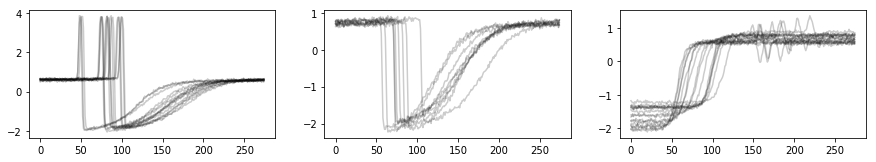

In [11]:
plt.figure(figsize=(15,8))
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in trace_series[clustering_dbscan.labels_ == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
plt.show()

In [ ]:
# DBA
plt.figure(figsize=(15,8))
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    trace_clust = []
    for xx in trace_series[clustering_dbscan.labels_ == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
        trace_clust.append(xx)
    dba_bar = dtw_barycenter_averaging(trace_clust, max_iter=100, verbose=False)
    plt.plot(dba_bar.ravel(), "r-", linewidth=2)
plt.show()

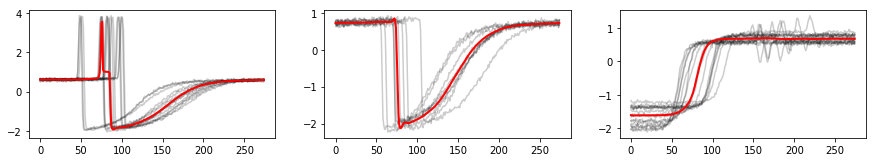

In [47]:
# Soft-DTW averaging
plt.figure(figsize=(15,8))
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    trace_clust = []
    for xx in trace_series[clustering_dbscan.labels_ == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
        trace_clust.append(xx)
    sdtw_bar = softdtw_barycenter(trace_clust, gamma=1., max_iter=100)
    plt.plot(sdtw_bar.ravel(), "r-", linewidth=2)
plt.show()

C:\Users\Toni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


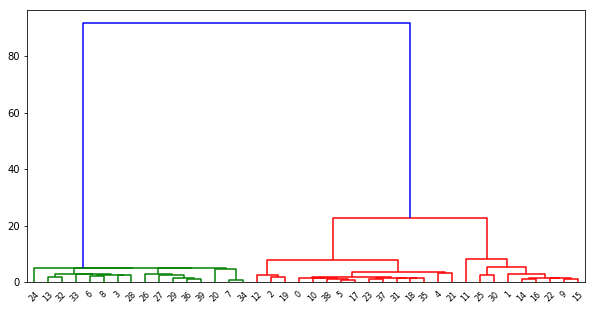

In [60]:
# Dendrogram
plt.figure(figsize=(10,5))
linkage_matrix = linkage(trace_dist_matrix, "single")
dendrogram(linkage_matrix, show_leaf_counts=True)
plt.show()

In [69]:
# Agglomerative
clustering_agglo_2 = AgglomerativeClustering(n_clusters=2).fit(trace_dist_matrix)

C:\Users\Toni\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [70]:
clustering_agglo_2.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

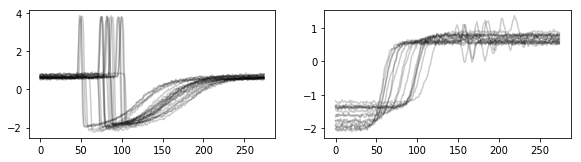

In [71]:
plt.figure(figsize=(15,8))
for yi in range(2):
    plt.subplot(3, 3, yi + 1)
    for xx in trace_series[clustering_agglo_2.labels_ == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
plt.show()

In [72]:
clustering_agglo_3 = AgglomerativeClustering(n_clusters=3).fit(trace_dist_matrix)

C:\Users\Toni\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [73]:
clustering_agglo_3.labels_

array([1, 2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 0, 1,
       2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

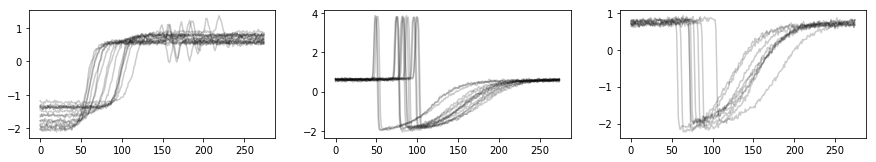

In [76]:
plt.figure(figsize=(15,8))
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in trace_series[clustering_agglo_3.labels_ == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
plt.show()

In [ ]:
# DBSCAN
# array([0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 0,
#       1, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2], dtype=int64)

# Agglo
# array([1, 2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 0, 1,
#       2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

# = Same clustering